# Prepare Data
Here we prepare data as 1 min level kline for BTC from 2019.1.1 to 2020.5.2 in bitfinex exchange

In [20]:
#!python3 -m pip install -e .. -U
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.metrics import roc_curve, auc

In [21]:
TZ = 'Asia/Shanghai'

In [22]:
data_path = './data/data'
data_platform_list = ['BITFINEX']
data_symbol_list = ['BTC']

data_df_list = []

In [23]:
for platform in data_platform_list:
    for symbol in data_symbol_list:
        pkl_file_path = data_path+'/'+symbol+'_USD_'+platform+'_latest.pkl'
        pandas_df = pd.read_pickle(pkl_file_path)
        #data_df_list.append(pkl_file.add_prefix(platform+'_'+symbol+':'))
        data_df_list.append(pandas_df)
data = pd.concat(data_df_list, axis=1)

# Feature Enginnering

Tactical indicators etc.

In [24]:
data['timestamp'] = data.index.tolist()

In [25]:
data

,open,high,low,close,volume,timestamp
2019-01-01 16:00:00+08:00,3850.000000,3850.00000,3849.600000,3849.60000,0.443293,2019-01-01 16:00:00+08:00
2019-01-01 16:01:00+08:00,3849.500000,3853.00000,3849.400000,3853.00000,9.085920,2019-01-01 16:01:00+08:00
2019-01-01 16:02:00+08:00,3853.000000,3857.00000,3852.960000,3853.20000,8.213360,2019-01-01 16:02:00+08:00
2019-01-01 16:03:00+08:00,3853.000000,3853.10000,3851.200000,3852.20000,6.385190,2019-01-01 16:03:00+08:00
2019-01-01 16:04:00+08:00,3852.200000,3852.30000,3852.200000,3852.30000,0.504622,2019-01-01 16:04:00+08:00
...,...,...,...,...,...,...
2020-12-07 15:55:00+08:00,19398.841056,19402.00000,19398.841056,19402.00000,8.340088,2020-12-07 15:55:00+08:00
2020-12-07 15:56:00+08:00,19402.690321,19418.62931,19402.690321,19418.62931,2.047179,2020-12-07 15:56:00+08:00
2020-12-07 15:57:00+08:00,19412.000000,19419.00000,19412.000000,19419.00000,0.153671,2020-12-07 15:57:00+08:00
2020-12-07 15:58:00+08:00,19410.000000,19414.00000,19410.000000,19414.00000,0.633814,2020-12-07 15:58:00+08:00


In [26]:
# Prepare features
import talib

# Moving averages
data['ma5m'] = talib.MA(data['close'], timeperiod = 5) / data['close'] 
data['ma10m'] = talib.MA(data['close'], timeperiod = 10) / data['close'] 
data['ma1h'] = talib.MA(data['close'], timeperiod = 60) / data['close'] 
data['ma4h'] = talib.MA(data['close'], timeperiod = 240) / data['close'] 
data['ma12h'] = talib.MA(data['close'], timeperiod = 720) / data['close'] 
data['ma1d'] = talib.MA(data['close'], timeperiod = 1440) / data['close']
data['ma5d'] = talib.MA(data['close'], timeperiod = 7200) / data['close'] 
data['ma10d'] = talib.MA(data['close'], timeperiod = 14400) / data['close'] 
data['ma30d'] = talib.MA(data['close'], timeperiod = 43200) / data['close'] 


# Standard deviation
data['std5m'] = talib.STDDEV(data['close'], timeperiod=5)/ data['close'] 
data['std10m'] = talib.STDDEV(data['close'], timeperiod = 10) / data['close'] 
data['std1h'] = talib.STDDEV(data['close'], timeperiod = 60) / data['close'] 
data['std4h'] = talib.STDDEV(data['close'], timeperiod = 240) / data['close'] 
data['std12h'] = talib.STDDEV(data['close'], timeperiod = 720) / data['close'] 
data['std1d'] = talib.STDDEV(data['close'], timeperiod = 1440) / data['close']
data['std5d'] = talib.STDDEV(data['close'], timeperiod = 7200) / data['close'] 
data['std10d'] = talib.STDDEV(data['close'], timeperiod = 14400) / data['close'] 
data['std30d'] = talib.STDDEV(data['close'], timeperiod = 43200) / data['close'] 

# Closeness to hundred / thousand
data['dis100'] = (data['close'] % 100) / 100 
data['dis1000'] = (data['close'] % 1000) / 1000 



C:\Users\Yuan\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Yuan\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([9.00000e+00, 5.60000e+01, 3.20000e+02, 1.95000e+02, 5.63000e+02,
        1.26600e+03, 3.88500e+03, 5.76200e+03, 1.46120e+04, 4.65010e+04,
        1.37749e+05, 3.97512e+05, 2.54872e+05, 7.25690e+04, 2.87060e+04,
        9.17900e+03, 6.52600e+03, 3.46900e+03, 1.22700e+03, 2.61000e+02,
        2.04000e+02, 1.23000e+02, 1.93000e+02, 2.68000e+02, 1.59000e+02,
        1.02000e+02, 9.70000e+01, 9.90000e+01, 6.60000e+01, 6.70000e+01,
        4.30000e+01, 8.80000e+01, 5.00000e+01, 3.00000e+01, 2.20000e+01,
        1.20000e+01, 1.00000e+01, 4.10000e+01, 4.10000e+01, 4.00000e+01,
        1.10000e+01, 3.00000e+00, 2.00000e+00, 4.00000e+00, 1.20000e+01,
        9.00000e+00, 3.00000e+00, 1.00000e+00, 3.00000e+00, 1.00000e+00]),
 array([0.71313324, 0.73730883, 0.76148442, 0.78566001, 0.80983559,
        0.83401118, 0.85818677, 0.88236236, 0.90653794, 0.93071353,
        0.95488912, 0.9790647 , 1.00324029, 1.02741588, 1.05159147,
        1.07576705, 1.09994264, 1.12411823, 1.14829381, 1.172469

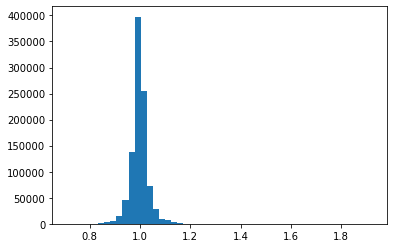

In [27]:
plt.hist(data['close'] / data['close'].shift(-1440),bins=50)

In [28]:
data['up_x%_in_1d_label'] = data['close'] > data['close'].shift(-1440) * 1.05

In [29]:
data=data.dropna()

# Simple Strategy Example

## Prepare data feed

# Machine Learning Strategy Example

refernces: https://towardsdatascience.com/model-design-and-selection-with-scikit-learn-18a29041d02a

## Dataset Preparation

In [30]:
train_start_time = pd.Timestamp('2019-01-01', tz=TZ)
train_end_time = pd.Timestamp('2020-4-1', tz=TZ)
val_start_time = pd.Timestamp('2020-4-1', tz=TZ)
val_end_time = pd.Timestamp('2020-08-01', tz=TZ)
test_start_time = pd.Timestamp('2020-08-01', tz=TZ)
test_end_time = pd.Timestamp('2020-12-31', tz=TZ)

train_data = data.loc[train_start_time:train_end_time]
val_data = data.loc[val_start_time:val_end_time]
test_data = data.loc[test_start_time:test_end_time]

In [31]:
feature_set = ['ma5m','ma10m','ma1h','ma4h','ma12h','ma1d','ma5d','ma10d','ma30d', \
               'std5m','std10m','std1h','std4h','std12h','std1d','std5d','std10d','std30d',\
               'dis100', 'dis1000']
label = ['up_x%_in_1d_label']

X_train = train_data[feature_set]
y_train = train_data[label]
X_val = train_data[feature_set]
y_val = train_data[label]
X_test = test_data[feature_set]
y_test = test_data[label]

In [32]:
feature_set[19]

'dis1000'

In [33]:
y_train.sum() / y_train.count()

up_x%_in_1d_label    0.068052
dtype: float64

## Define model and hyperparameter

In [34]:
# For reading, visualizing, and preprocessing data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier

### Initialize Sample Reweighting

In [35]:
from sample_reweight import SampleReweight
from featureSelection import featureSelection

In [39]:
LIMITED_SAMPLE = False
EXAMPLES = 40000 if LIMITED_SAMPLE else X_train.shape[0]

# number of submodels
K = 5

# initialize sample weights and parameters
w = np.ones(X_train.shape[0])[:EXAMPLES]

ALPHA_1 = 1
ALPHA_2 = 1
NUM_BINS = 10
GAMMA = 0.9

# initialize feature selection parameters
NUM_BINS_FS = 3
ratio = [0.8, 0.6, 0.4]
feature_selected = feature_set

### Define model

In [40]:
clfs = [GradientBoostingClassifier(random_state=0) for i in range(K)]

### Train Sub-model Loops

In [41]:
try:
    from tqdm import tqdm
    submodels = tqdm(clfs)
except ImportError:
    submodels = clfs

list_feature_selected = []
new_features=[]
list_feature_selected.append(feature_selected.copy())
for model in submodels:
    model.fit(X_train[:EXAMPLES][feature_selected], y_train[:EXAMPLES], sample_weight=w)
    
    staged_pred = []
    
    for i, pred in enumerate(model.staged_predict_proba(X_train[:EXAMPLES][feature_selected])):
        staged_pred.append(np.log(pred))
    
    # initialize sample reweighting
    SR = SampleReweight(X_train[:EXAMPLES][feature_selected], y_train[:EXAMPLES].to_numpy(dtype=int), a1=ALPHA_1, a2=ALPHA_2, b=NUM_BINS, gamma=GAMMA)
    w = SR.reweight(model, staged_pred)
    print(np.max(w))

    # feature selection
    feature_selected_index = featureSelection(model, X_val[:EXAMPLES][feature_selected].to_numpy(), y_val[:EXAMPLES].to_numpy(), NUM_BINS_FS, ratio)
    for index in feature_selected_index:
        new_features.append(feature_selected[index])
    feature_selected = new_features.copy()
    list_feature_selected.append(feature_selected.copy())
    new_features = []

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


44.61639852304103


 20%|████████████████▊                                                                   | 1/5 [00:21<01:26, 21.53s/it]C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-41-1a27a41d7878>:16: RuntimeWarning: divide by zero encountered in log
  staged_pred.append(np.log(pred))
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


16.62877315696967


C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\OneDrive\projects\ML2020Fall\featureSelection.py:41: RuntimeWarning: invalid value encountered in subtract
  g[f] = np.std(np.subtract(Lf, L), axis = 0)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\OneDrive\projects\ML2020Fall\featureSelection.py:41: RuntimeWarning: invalid value encountered in subtract
  g[f] = np.std(np.subtract(Lf, L), axis = 0)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\OneDrive\projects\ML2020Fall\featureSelection.py:41: RuntimeWarning: inv

42.52070386221928


C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\anaconda3\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in l

94.09961867893895


C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\anaconda3\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1252: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\Yuan\anaconda3\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subt

11.061450192761328


In [ ]:
feature_selected

In [ ]:
counter = -1
decision_list = []
for clf in clfs:
    counter += 1
    decision_list.append(clf.decision_function(X_test[list_feature_selected[counter]]))
print(decision_list)
print(np.asarray(decision_list))
y_score = np.mean(np.asarray(decision_list), axis = 0)

#y_score = np.mean(np.asarray([clf.decision_function(X_test) for clf in clfs]), axis=0)
#print([clf.decision_function(X_test) for clf in clfs][1])
print(y_score)

## Evaluate Model

In [ ]:
def plot_roc(labels, scores):
    lw = 2
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='(AUC = %0.3f)' % (roc_auc))
    #plt.plot([eer], [1-eer], marker='o', markersize=5, color="navy")
    #plt.plot([0, 1], [1, 0], color='navy', lw=1, linestyle=':')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")

In [ ]:
plot_roc(y_test, y_score)